In [ ]:
###RNN#####

#Part 1 preprocessing
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##Importing the training dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#the below line created numpy array
training_set = dataset_train.iloc[:, 1:2].values


In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#no of stockproces
#no of timesteps
#no of indicators

In [ ]:
##Part 2 building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#Initializing the RNN
regressor = Sequential()


In [ ]:
#Adding the first layer of LSTM and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#Second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#Third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fitting the RNN and to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0422
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0038
Epoch 13/100


In [ ]:
##Part 3 Making the predictions and visulising the results

#Getting the stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
#Getting the predicted stock price of 2017
#for vertical concation axis=0 and for horizontal axis=1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [ ]:
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Predict
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

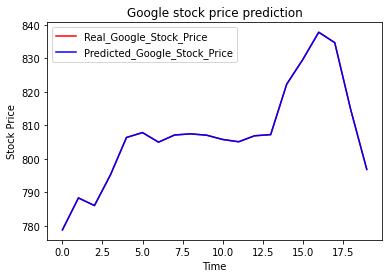

In [ ]:
#visualising the result
plt.plot(real_stock_price, color = 'red',label='Real_Google_Stock_Price')
plt.plot(real_stock_price, color = 'blue',label='Predicted_Google_Stock_Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))